### Урок 9. Линейная регрессия Логистическая регрессия

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

In [4]:
s=np.array([27, 37, 42, 48, 57, 56, 77, 80])
p=np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
n = 8

<function matplotlib.pyplot.show(close=None, block=None)>

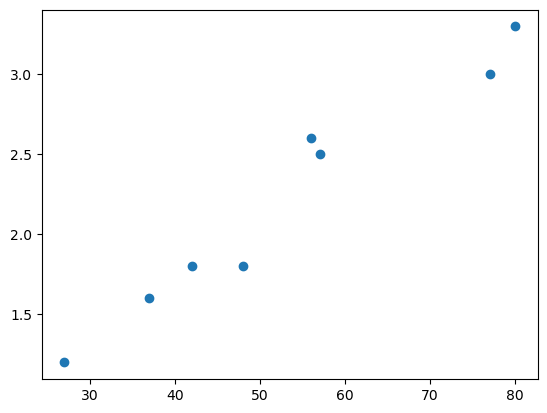

In [5]:
plt.scatter(s, p)
plt.show

**Рассчёт коэффициентов по формулам**

In [6]:
#b1 = (n * np.sum(p * s) - np.sum(s) * np.sum(p)) / (n * np.sum(s ** 2) - np.sum(s) ** 2)
b1 = (np.mean(s * p) - np.mean(s) * np.mean(p)) / (np.mean(s ** 2) - np.mean(s) ** 2) # второй вариант записи формулы
b1

0.03874584717607981

In [7]:
b0 = np.mean(p) - b1 * np.mean(s)
b0

0.17147009966776983

In [8]:
y_pred = b0 + b1 * s
y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

In [9]:
resid = p - y_pred
resid

array([-0.01760797, -0.00506645,  0.00120432, -0.23127076,  0.12001661,
        0.25876246, -0.15490033,  0.02886213])

**Проверка на нормальность**    
***тест Шаппиро-Уилка***

In [10]:
stats.shapiro(resid)

ShapiroResult(statistic=0.9600728154182434, pvalue=0.8107935786247253)

***QQ-график*** 

<function matplotlib.pyplot.show(close=None, block=None)>

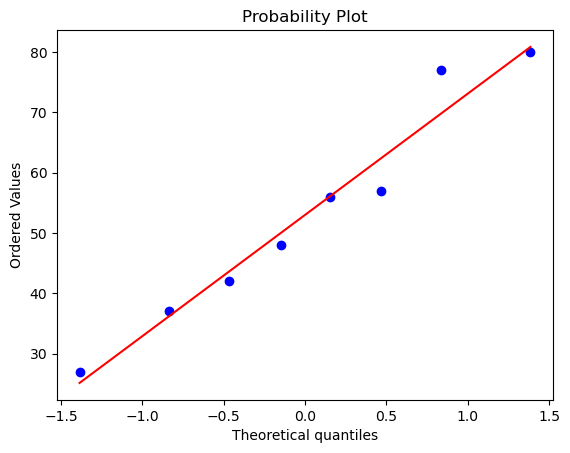

In [12]:
from IPython.core.payload import PayloadManager
import pylab
stats.probplot(s, dist="norm", plot = pylab)
pylab.show

**Функция потерь**

In [24]:
mse = ((p - y_pred) ** 2).sum() / n
mse

0.020001557308970096

**Матричный метод рассчёта коэффициентов линейной регресии.**

In [32]:
x = s.reshape((8, 1)) # преобразование массива в вектор-столбец
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [33]:
y = p.reshape((8, 1))
y

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [37]:
X = np.hstack([np.ones((8, 1)), x])  # добавление столбца со значениями 1
X

array([[ 1., 27.],
       [ 1., 37.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 57.],
       [ 1., 56.],
       [ 1., 77.],
       [ 1., 80.]])

$\bar B=(X^T * X)^{-1} * X^T * Y$

In [36]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[0.1714701 ],
       [0.03874585]])

**Расчет коэффициентов методом градиентного спуска**

In [38]:
# используем те же массивы s и p
def mse_(B1, y = y, x = x, n = 8):  # функция рассчета меры измерения ошибки
    return np.sum(B1 * x - y) ** 2 /n

In [39]:
alfa = 1e-6 
# mse = 1/n * np.sum((B1 * x - y) ** 2)
# mse = (2/n) * np.sum((B1 * x - y) * x)

In [40]:
B1 = 0.1

In [41]:
for i in range(10):
    B1 -= alfa * (2/n) * np.sum((B1 * x - y) * x)
    print ('B1 = {}'.format(B1))

B1 = 0.09963717500000001
B1 = 0.0992766067715
B1 = 0.09891828127738128
B1 = 0.09856218456783597
B1 = 0.09820830277982404
B1 = 0.09785662213653352
B1 = 0.09750712894684428
B1 = 0.09715980960479491
B1 = 0.09681465058905309
B1 = 0.09647163846238918


In [42]:
for i in range(3000):
    B1 -= alfa * (2/n) * np.sum((B1 * x - y) * x)
    if i% 500 == 0:
        print ('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteration = 0, B1 = 0.09613075987115312, mse = 65.89199818291225
Iteration = 500, B1 = 0.04407361917387843, mse = 0.09839370271927277
Iteration = 1000, B1 = 0.041774262033161175, mse = 0.0009616940581216849
Iteration = 1500, B1 = 0.041672699727015455, mse = 0.0021377729010401765
Iteration = 2000, B1 = 0.04166821373314919, mse = 0.002200410800751066
Iteration = 2500, B1 = 0.041668015587382985, mse = 0.0022031983658595436


In [43]:
mse_(0.041668)

0.0022034177280000366

Получили модель вида $\bar y = 0.0417 * x$

*Функция в Python для построения линейной регрессии:*

In [44]:
model = LinearRegression() # зададим модель линейной регресии

In [70]:
# делаем массив s двумерным атрибутом 
s = s.reshape(-1, 1) 
s

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [52]:
regres = model.fit(s, p) # подбираем коэффициенты

In [54]:
print(regres.intercept_) # выводим интерсепт

0.17147009966777427


In [55]:
print(regres.coef_) # выводим коэффициент 

[0.03874585]


*Функция predict()*

In [56]:
y_pred = model.predict(s) 
y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

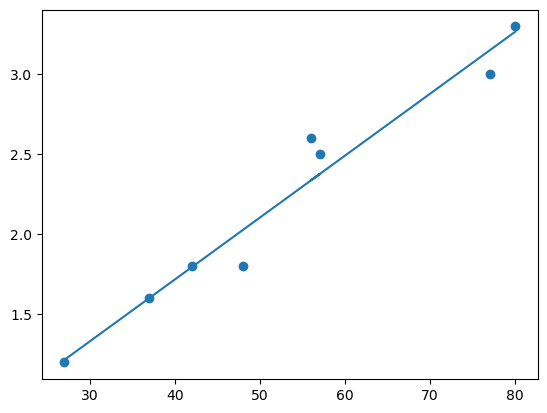

In [58]:
plt.scatter(s, p)
plt.plot(s, 0.1715 + 0.0387 * s)
plt.show()

In [61]:
df = pd.DataFrame({'реальные': p, 'предсказанные': y_pred})
df

,реальные,предсказанные
0,1.2,1.217608
1,1.6,1.605066
2,1.8,1.798796
3,1.8,2.031271
4,2.5,2.379983
5,2.6,2.341238
6,3.0,3.154900
7,3.3,3.271138


*Коэффициент детерминации Фишера*

In [67]:
r = np.corrcoef(s, p) [1, 0]
r

0.9785768205829907

In [68]:
r ** 2

0.9576125937823147

In [71]:
regres.score(s, p)

0.9576125937823151

*Оценка значимости математической модели*

Рассчитаем критерий  Фишера F в  Python 

Критерий Фишера F = Msf / Mso 
Msf фактическая сумма квадратных отклонений на одну степень свободы
Msf = Ssf / df1
Mso остаточная сумма квадратных отклонений на одну степень свободы
Mso = Sso / df2
df1 - степень свободы числителя df1 = p - 1, где p - число параметров (в примере 2: s и p)
df2 - степень свободы знаменателя df2 = n - p, где n - число парных измерений (в примере n=8)
Ssf - фактическая сумма кадратных отклонений
Ssf - остаточная сумма кадратных отклонений

In [72]:
df1 = 2 - 1
df2 = 8 - 2

In [75]:
SSf = sum((y_pred - np.mean(p)) ** 2)
SSf

3.614987541528238

In [77]:
SSo = np.sum((p - y_pred) ** 2)
SSo

0.1600124584717606

In [78]:
Msf = SSf / df1
Msf

3.614987541528238

In [79]:
Mso = SSo / df2 
Mso

0.026668743078626767

In [80]:
F = Msf / Mso
F

135.55147803067672

In [81]:
stats.f.ppf(1 - 0.05, 1, 6)

5.987377607273699

 **Оценка значимости отдельных коэффициентов**

Помимо оценки статистической значимости модели в целом, также используют оценку значимости отдельных коэффициентов. Для этого воспользуемся критерием Стьюдента. Критерий Стьюдента рассчитываем:  значение коэффициента разделить на его стандартную ошибку. Вычисления приведены ниже. Mso находили выше при расчете критерия Фишера.

In [89]:
# tb = b1 / sb
# t0 = b0 / s0
sb = np.sqrt(Mso / np.sum((s - np.mean(s)) ** 2))
sb

0.0033279211856704735

In [90]:
s0 = np.sqrt((Mso * np.sum(s ** 2)) / (n * sum((s - np.mean(s)) ** 2)))
s0

0.18558942531859646

In [91]:
tb = b1 / sb
tb

11.642657687601973

In [92]:
t0 = b0 / s0
t0

0.9239217125297502

In [93]:
stats.t.ppf(1-0.025, 6) # табличный коэффициент Стьюдента

2.4469118487916806